#Importing required Libraries

In [2]:
import numpy#for numerical analysis
import tensorflow#open source ml tool by google

In [3]:
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [4]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow import keras


In [5]:
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

#Loading dataset

Dataset is available in tensorflow dataset repository

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Training Dataset has 60000 images & testing has 10000 images

In [8]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


#  Analyze the data

In [9]:

x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
y_train[3]

1

In [11]:
import matplotlib.pyplot as plt

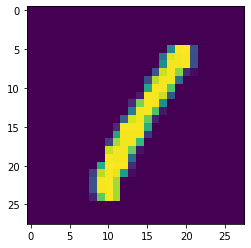

In [12]:
plt.imshow(x_train[3])

#Reshaping the data

,As we are using Deep learning neural network, the input for this network to get trained on should be of higher dimensional. Our dataset is having three-dimensional images so we have to reshape them too higher dimensions

In [13]:
#(batch,height,width,channel)
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

#Applying one hot encoding

One hot encoding to convert numerical values to classes where 0 to 9 are 10 seperate classes if value is 5 class 5 is 1 else 0

In [14]:
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [15]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#Add CNN Layers

In [16]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))

#Compiling the model

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#Train the model

In [18]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 199s 106ms/step - loss: 0.2733 - accuracy: 0.9503 - val_loss: 0.0850 - val_accuracy: 0.9746
Epoch 2/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0695 - accuracy: 0.9790 - val_loss: 0.0855 - val_accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 201s 107ms/step - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.0875 - val_accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0980 - val_accuracy: 0.9771
Epoch 5/5
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0956 - val_accuracy: 0.9782


#Observing the Metrics

In [19]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("metrics-score=>test loss & accuracy")
print(metrics)

metrics-score=>test loss & accuracy
[0.09562274813652039, 0.9782000184059143]


#Test the model

In [20]:
prediction=model.predict(x_test[:5])
print(prediction)

1/1 [==============================] - 0s 98ms/step
[[1.18173847e-11 9.52902049e-21 6.94554900e-11 9.11875556e-14
  2.24930361e-20 2.68981847e-18 1.22950938e-23 1.00000000e+00
  4.42049758e-14 1.68453207e-12]
 [9.64192139e-08 1.30416060e-08 9.99999762e-01 1.95143142e-12
  5.23756860e-14 3.49963282e-16 1.42291952e-07 9.44577736e-21
  1.14221175e-08 3.31683676e-17]
 [8.73609129e-10 9.99998927e-01 2.40697506e-08 2.39931447e-13
  1.09108566e-06 7.64363062e-09 4.16817882e-12 2.76851094e-11
  1.77220105e-08 1.20214126e-14]
 [9.99999762e-01 6.04883062e-16 4.21709473e-10 1.22298265e-17
  5.80041917e-12 3.26751716e-11 4.26187796e-09 4.43471791e-14
  7.78125550e-11 2.02092650e-07]
 [5.77752195e-15 3.44288056e-16 5.37386921e-13 3.51846601e-17
  1.00000000e+00 1.21636287e-16 4.95967754e-16 5.68361513e-14
  1.86224767e-15 4.06822753e-12]]


In [21]:
import numpy as np

In [22]:
print(np.argmax(prediction,axis=1))

[7 2 1 0 4]


In [23]:
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
